<a href="https://colab.research.google.com/github/Joe-hyper/DSW7C/blob/main/Copy_of_Copy_of_Python_Notebook_IP_Week_7_Core_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question**

### a) Specifying the question
      Predict housing prices upon being provided with predictor variables.

### b) Defining the metric for success
      Attaining a high level accuracy for each model used.

### c) Understanding the context
      As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### d) Recording the experimental design
      
      *   Define the question, the metric for success, the context, experimental design taken.
      *   Read and explore the given dataset.
      *   Define the appropriateness of the available data to answer the given question.
      *   Find and deal with outliers, anomalies, and missing data within the dataset.
      *   Find and deal with outliers, anomalies, and missing data within the dataset.
      *   Performing regression analysis:
        *   Incorporate categorical independent variables into your models.
        *   Check for multicollinearity
      *   Provide a recommendation based on your analysis.
        *   Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
      *   Challenge your solution by providing insights on how you can make improvements in model improvement.








### e) Data Relevance

# **2. Importing Libraries**

In [1]:
# librarires required.
# Other librariries neccesary will be imported as anlaysis continues

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **3. Reading the Data**

In [2]:
# loading data - house data
housedf = pd.read_csv('house_data.csv')

# **4. Checking the Data**

In [3]:
# shape of data
print(f'The dataset has {housedf.shape[0]} records, and {housedf.shape[1]} columns.')

The dataset has 21613 records, and 20 columns.


In [4]:
# lets check the info of the dataset
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
# finding out the data types in our column
housedf.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# checking columns of the dataset
housedf.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# first 5 rows of the dataset
housedf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# last 5 rows of dataset
housedf.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
# statistical summary of dataset
housedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# **5. Tidying the Data**

In [10]:
# our aim i to predict housing prices with the given factors
# we therfore certainly dont need some columns
# In my opinion we need to drop the id, lat, long , sqftliving 15 and sqftlot15
# I honestly dont the difference of this two columns with the others
# i.e sqft living 15, sqft lot 15
# lets check unique values of this columns
print(housedf['sqft_living15'].unique())
print(housedf['sqft_living'].unique())
print(housedf['sqft_lot'].unique())

[1340 1690 2720 1360 1800 4760 2238 1650 1780 2390 2210 1330 1370 2140
 1890 1610 1060 1280 1400 4110 2240 1220 2200 1030 1760 1860 1520 2630
 2580 1390 1460 1570 2020 1590 2160 1730 1290 2620 2470 2410 3625 1580
 3050 1228 2680  970 1190 1990 1410 1480 2730 1950 2250 2690 2960 2270
 2570 2500 1440 2750 2221 1010 3390 3530 1640 1510 2420 1940 3240 1680
  890 1130 3350 2350 1870 1720 1850 1900 1980 2520 1350 1750 1160 2550
 2370 1240 1270 2990 1380 1540 2090 2640 1830 1620 1880 2340 1710 2700
 3060 2660 1700 1970 1420 2060 2480 1550 1170 2820 1560 2230 2840 1450
 1500 3160 1200 3400 2110 2920 1770 1070 1930 3740 2260 1670 2290 1050
 2540 2190 2030 1230 2330 1300 1430 2770 1250 1630 2590 2130 1100 3836
 1320 2120 3070 1910 2080 1960 2280 1150 3430 2070 2600  830 1260 3120
 2010 1660 1600 2380 3890 4180 2653 2670 3920 2300 2310 2320 3150 1740
 2400 4550 2510 2440 2880 3860 2150 1310 1820 3080  880 2560 3470 1020
 2040 2610 1810 2860 3480 3130 3360 4050 2450 1790 3180 3600 2000 2430
 2850 

In [11]:
# dropping unneccessary columns
# sqft living 15 aand sqft lot 15 in my opinion are replicas of sqft living and sqft lot , we threfore drop one set, we cant have two.
housedf.drop(['id', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] , inplace=True, axis=1)

In [12]:
# preview dataset
housedf.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178


In [13]:
# checking for missing values
# defining missing value function
def percent_missing(housedf):
  # ---------------------
  df = housedf

  missing = df.isnull().sum().sort_values(ascending=False)

  percent = (df.isnull().sum() / len(df)).sort_values(ascending=False) 

  missing_value_df = pd.DataFrame({'column_name': missing,
                                'percent_missing': percent})
  
  return missing_value_df

In [14]:
# calling out missing value function
percent_missing(housedf)

,column_name,percent_missing
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0
condition,0,0.0
grade,0,0.0


      Our dataset is quite clean in terms of missing values. We have no missing values!

In [15]:
# finding duplicate values in our dataset
housedf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [16]:
# confirming whether duplicates exist
housedf.duplicated().any().any()

True

In [17]:
# sum of duplicates in our dataset
housedf.duplicated().sum()

8

In [18]:
# dropping duplicates
housedf.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027


In [19]:
# from the data info we observed that our columns waterfront and zipcode, condition, yr dtype is int, thus we change this to object since its categorical
housedf['waterfront'] = housedf['waterfront'].astype(object)
housedf['zipcode'] = housedf['zipcode'].astype(object)
housedf['condition'] = housedf['condition'].astype(object)
housedf['yr_built'] = housedf['yr_built'].astype(object)
housedf['yr_renovated'] = housedf['yr_renovated'].astype(object)
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  object 
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  object 
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  object 
 13  yr_renovated   21613 non-null  object 
 14  zipcode        21613 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 2.5+ MB


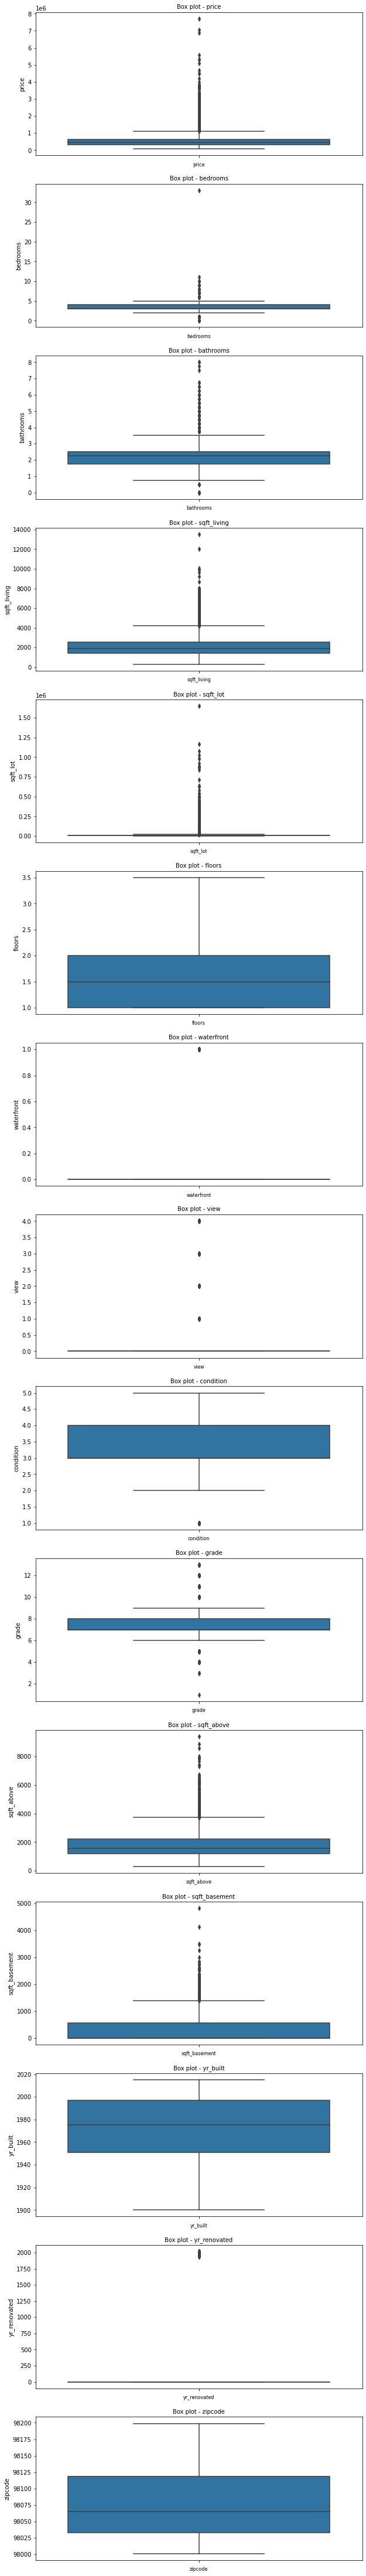

In [20]:
# lets check for outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']

fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=housedf[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

      We shall not remove any outliers since the outliers significantly afect result of the analysis.

# **6. Analysis**

### **a) Univariate Analysis**

### i) Categorical variables

In [21]:
# lets get a list of our categorical columns
categorical = list(housedf.select_dtypes(include = ['object']).columns)
categorical

['waterfront', 'condition', 'yr_built', 'yr_renovated', 'zipcode']

In [22]:
# our only categorical variable is waterfront
# defining function for categorical plots
# Categorical Plots
def CatPlots(column, housedf):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(housedf[column], palette = 'flare', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)

  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


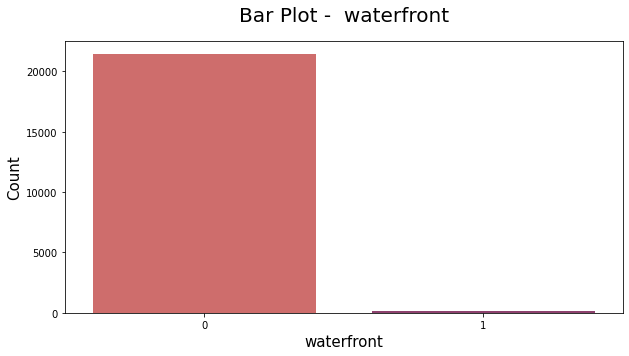

In [23]:
# bar plot explaining frequency distribution of houses with wayerfronts
CatPlots('waterfront', housedf);


      *    We observe that most houses don't have a waterfront.
      *    Very few houses have a waterfront.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


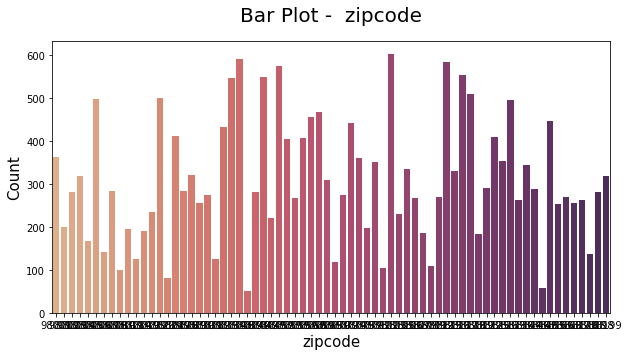

0    98103
dtype: object

In [24]:
# bar plot explaining frequency distribution of zipcodes of houses
CatPlots('zipcode', housedf);
housedf['zipcode'].mode()


    * Zipcode 98103; is the zipcode at which most houses are located.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


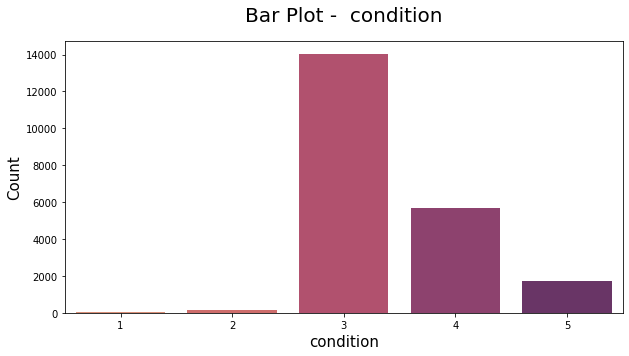

In [25]:
# bar plot explaining frequency distribution of condition of houses
CatPlots('condition', housedf);

      Most houses are at a condition level of 3. This would be explained better, if the glossary was more detailed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


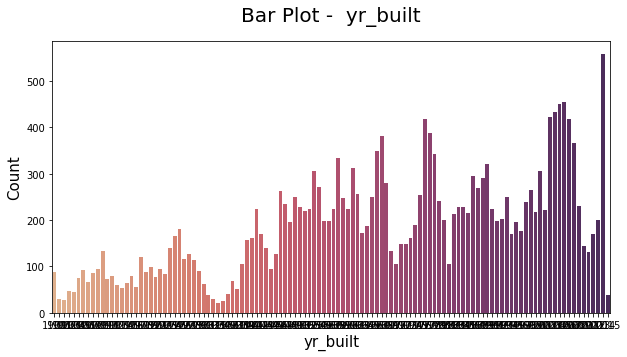

In [26]:
# bar plot explaining frequency distribution of year built of most houses
CatPlots('yr_built', housedf);

      Most houses were built in the year 2014

### ii)Numerical variables

In [27]:
# lets get a list of our numerical columns
numerical = list(housedf.select_dtypes(include = ['integer']).columns)
numerical

['bedrooms',
 'sqft_living',
 'sqft_lot',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement']

**Measures of central tendency**

In [28]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, housedf):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {housedf[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {housedf[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {housedf[column].mode()}")

In [29]:
# Mean
MeasureCentral('mean', numerical, housedf)

bedrooms column mean = 3.37084162309721
sqft_living column mean = 2079.8997362698374
sqft_lot column mean = 15106.967565816869
view column mean = 0.23430342849211122
grade column mean = 7.656873178179799
sqft_above column mean = 1788.3906907879516
sqft_basement column mean = 291.5090454818859


        Mean square feet for living room size is 2079.8997
        Mean square feet for basement room size is 291.509
        The average number of bathrooms for the houses was 3.3



In [30]:
# Median
MeasureCentral('median', numerical, housedf)

bedrooms column median = 3.0
sqft_living column median = 1910.0
sqft_lot column median = 7618.0
view column median = 0.0
grade column median = 7.0
sqft_above column median = 1560.0
sqft_basement column median = 0.0


**Measures of dispersion**

In [31]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, housedf):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {housedf[column].max() - housedf[column].min()}")
    elif measure == 'IQR':
      Q1 = housedf[column].quantile(0.25)
      Q3 = housedf[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {housedf[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {housedf[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {housedf[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {housedf[column].kurt()}")

In [32]:
# Range
MeasureDistribution('range', numerical, housedf)

bedrooms column range = 33
sqft_living column range = 13250
sqft_lot column range = 1650839
view column range = 4
grade column range = 12
sqft_above column range = 9120
sqft_basement column range = 4820


In [33]:
# iqr
MeasureDistribution('IQR', numerical, housedf)

bedrooms column IQR = 1.0
sqft_living column IQR = 1123.0
sqft_lot column IQR = 5648.0
view column IQR = 0.0
grade column IQR = 1.0
sqft_above column IQR = 1020.0
sqft_basement column IQR = 560.0


In [34]:
# variance
MeasureDistribution('var', numerical, housedf)

bedrooms column variance = 0.8650150097573724
sqft_living column variance = 843533.6813681519
sqft_lot column variance = 1715658774.1754541
view column variance = 0.5872426169774596
grade column variance = 1.3817032893475767
sqft_above column variance = 685734.6672685045
sqft_basement column variance = 195872.66840094145


In [35]:
# kurtosis
MeasureDistribution('kurt', numerical, housedf)

bedrooms column kurt = 49.06365318170099
sqft_living column kurt = 5.24309298981711
sqft_lot column kurt = 285.0778196973658
view column kurt = 10.893021684601504
grade column kurt = 1.1909320773987657
sqft_above column kurt = 3.40230362139787
sqft_basement column kurt = 2.7155742114129353


### b) **Bivariate Analysis**

i) Numerical - Numerical variables

In [36]:
# Bar plot function
def BarPlotBiv(x,y, housedf):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(housedf[x], housedf[y])
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


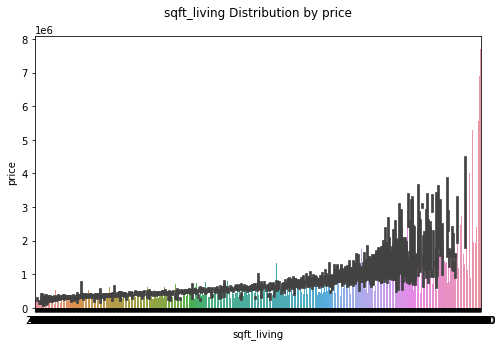

In [37]:
# Plot
BarPlotBiv('sqft_living', 'price', housedf)

      We can observe that as living room square feet increases, price of the house also increases; a positive relationship. We can get further evidence of this through a scatter plot.

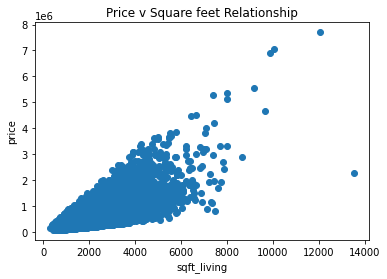

In [38]:
#lets plot a scatter plot
plt.scatter(housedf["sqft_living"] , housedf["price"])

# title
plt.title('Price v Square feet Relationship')

# x axis
plt.xlabel('sqft_living')

# y axis
plt.ylabel('price')


# viz scatter plot
plt.show()

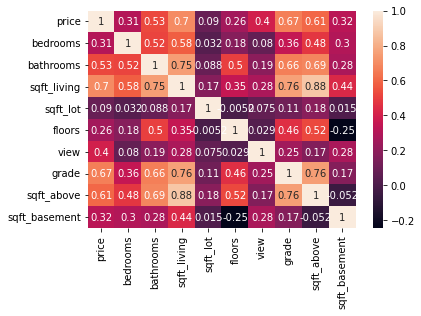

In [39]:
# heatmap showing correlation of numerical variables
sns.heatmap(housedf.corr(),annot=True)
plt.show()

      As expected, we'll have negative correlations between floors and basement.
      square feet above and square feet living have a very high positive correlation.
    

### c) **Multivariate Analysis**

Linear Discriminant Analysis

In [40]:
b =  housedf.drop('price', 1)
k = housedf['price']
print(k)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [41]:
# dividing the dataset into training and test sets

from sklearn.model_selection import train_test_split
b_train, b_test, k_train, k_test = train_test_split(b, k, test_size=0.2, random_state=0)
b_train, b_test, k_train, k_test

(       bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  \
 5268          3       1.00         1570      5510     1.0          0     0   
 16909         3       2.50         1780     11000     1.0          0     0   
 16123         3       1.50         1090      9862     1.0          0     0   
 12181         4       2.50         2210      7079     2.0          0     0   
 12617         3       2.50         1800      4763     2.0          0     0   
 ...         ...        ...          ...       ...     ...        ...   ...   
 13123         5       5.00         3960     94089     2.0          0     0   
 19648         2       2.50         1400      1262     2.0          0     0   
 9845          3       2.25         2360     14950     1.0          0     0   
 10799         4       2.00         2370     76665     2.0          0     0   
 2732          4       2.25         2380     16236     1.0          0     0   
 
       condition  grade  sqft_above  sqft_basement

In [42]:
# Feature scaling
#
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
b_train = sc.fit_transform(b_train)
b_test = sc.transform(b_test)
b_train
b_test

array([[-1.45036186, -0.8006594 , -0.7055937 , ...,  0.95086322,
        -0.21397278,  0.87964791],
       [ 0.67029408,  1.46551321,  2.80387041, ...,  0.57778683,
        -0.21397278, -1.36317051],
       [-1.45036186, -1.77187623, -0.69476202, ..., -1.93199978,
        -0.21397278,  0.54322515],
       ...,
       [-0.39003389,  0.49429638, -0.78141545, ...,  0.54387079,
        -0.21397278, -0.48473329],
       [-0.39003389, -1.44813729, -1.22551431, ..., -1.42325925,
        -0.21397278,  0.524535  ],
       [-0.39003389,  0.17055743, -0.47812843, ..., -0.13444991,
        -0.21397278, -1.30710005]])

In [43]:
# Peforming LDA
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
b_train = lda.fit_transform(b_train, k_train)
b_test = lda.transform(b_test)
b_train
b_test

array([[-1.46749892],
       [ 5.89449953],
       [-0.26123356],
       ...,
       [-1.42982501],
       [-1.86217239],
       [-1.04691963]])

In [44]:
# Training and Making Predictions using the random forest classifier 
# to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(b_train, k_train)
k_pred = classifier.predict(b_test)
k_pred

array([ 250000., 1050000.,  450000., ...,  250000.,  250000.,  450000.])

In [45]:
# Evaluating the Performance of the algorithm 
# To find the accuracy of the prediction, we'll use a confusion matrix
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(k_test, k_pred)
print(cm)
print('Accuracy' + str(accuracy_score(k_test, k_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.013879250520471894


      As expected, LDA has a very low acccuracy hence making it an unviable method to conduct multivariate analysis. This is because what Hass Conssults wishes to predict is not a classification problem. No other multivariate analysis will be carried out, but regression should help us MORE!

# **7. Implementing the solution**

In [46]:
# In this section we will carry out training tests
# imporing of necessary libraries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [47]:
# When carrying out multiple linear regression it is vital to check for multicolinearity.
# We want to avoid multicollinearity
# 
correlations = housedf.corr()

In [48]:
# detecting presence of multicollinearity via vif
# variance inflation factor
# vif > 5 should be dropped
# 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement
price,2.389840,0.203855,0.089163,7.329762e-01,0.090902,0.046958,-0.446471,-0.752615,-1.703049e+00,-1.007580e+00
bedrooms,0.203855,1.642715,-0.405099,8.490059e-02,0.111226,0.098039,0.095391,0.286342,-1.044477e+00,-5.963177e-01
bathrooms,0.089163,-0.405099,2.925414,-1.066953e-01,0.015211,-0.837783,0.037923,-0.489107,-9.936003e-01,-8.702339e-01
sqft_living,0.730157,0.067983,-0.122271,-1.468355e+14,0.180628,1.818498,-0.163573,0.231165,1.323908e+14,7.075656e+13
sqft_lot,0.090902,0.111226,0.015211,1.825580e-01,1.063531,0.137891,-0.055291,0.040043,-5.757518e-01,-1.507533e-01
floors,0.046958,0.098039,-0.837783,1.828754e+00,0.137891,1.806131,-0.008509,-0.315640,-1.851973e+00,-2.039831e-01
view,-0.446471,0.095391,0.037923,-1.558966e-01,-0.055291,-0.008509,1.237292,-0.043786,1.683033e-01,-1.550553e-01
grade,-0.752615,0.286342,-0.489107,3.131349e-01,0.040043,-0.315640,-0.043786,3.114732,-1.839054e+00,-5.274458e-01
sqft_above,-1.695505,-1.024523,-1.003927,1.323908e+14,-0.573114,-1.836872,0.174614,-1.762872,-1.193671e+14,-6.379601e+13
sqft_basement,-1.006197,-0.583997,-0.869411,7.075656e+13,-0.149624,-0.196547,-0.151394,-0.486941,-6.379601e+13,-3.409592e+13


      All variables have a VIF below 5, good!

## **7a) Modelling**

### i) Multiple Linear Regression

In [49]:
# defining our x and y
# splitting the data to train and test sets
# 
X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode']]
y = housedf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
# fitting our model into or data
# 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# getting a dataframe of the coefficients
# 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-44246.472526
bathrooms,43897.965981
sqft_living,177.182382
sqft_lot,-0.138557
floors,32340.347007
condition,20047.308992
grade,132265.850016
sqft_basement,28.423508
yr_built,-3820.922544
zipcode,105.718773


In [52]:
# Making predictions
# 

y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17384,297000.0,3.045002e+05
722,1580000.0,1.538326e+06
2680,562100.0,5.380809e+05
18754,631500.0,5.903067e+05
14554,780000.0,7.927726e+05
...,...,...
18588,1100000.0,3.755776e+05
6784,700000.0,5.236044e+05
14510,380000.0,3.131280e+05
18917,268000.0,2.915030e+05


      We observe that the margin between actual results and predicted results is not that big.

In [53]:
# computing the r-score and RMSE
# 
from sklearn import metrics
from sklearn.metrics import r2_score

linear_R2 = r2_score(y_test, y_pred)
print('The R2 Score for the linear model:', linear_R2)

print('The Root Mean Squared Error for the linear model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


The R2 Score for the linear model: 0.616006588672644
The Root Mean Squared Error for the linear model: 229748.0011870302


     Abur 61% of the variation observed in price of houses comes from changes in the included inddependent variables** which means that about 39% of the variation in price comes from other variabless/factors not included in this model.**

Residual plots

In [54]:
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

2026.6805641211358

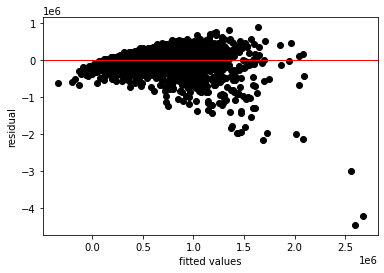

In [55]:
# plotting our residuals
# 

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

      Residuals are m==not eveenly distributed aroundd the mean.

In [56]:
# lets check for hetereskedasticity using bartleyys test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('The critical value is:', critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

The critical value is: inf
the variances are homogeneous!


In [57]:
# cross validation

In [58]:
from sklearn.model_selection import LeaveOneOut

X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode']].values
y = housedf['price'].values

folds = LeaveOneOut()

# if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0  
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 21613 folds
trained 21613 models


144960.1650401501

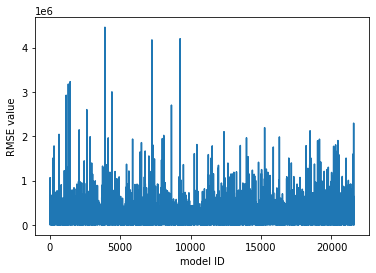

In [59]:
#  plotting out the RMSE values across all models
# 

import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

      Model ids and their rmse performance.
      The 10000th model has a low rmse attributing to a good model.

**Limitations of Linear Regression**

          *   Is best suited to handle continuous numerical variables
          *   Models can be biased by a few outliers in the data.
          *   Sensetive to multicollinearity.



### ii)Quantile Regression

In [68]:
# changing back categorical variables to numerical
# regression uses numerical variables
housedf['waterfront'] = housedf['waterfront'].astype(int)
housedf['zipcode'] = housedf['zipcode'].astype(int)
housedf['condition'] = housedf['condition'].astype(int)
housedf['yr_built'] = housedf['yr_built'].astype(int)
housedf['yr_renovated'] = housedf['yr_renovated'].astype(int)
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.5 MB


In [69]:
# defining our x and y
# splitting the data to train and test sets
# 
X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode']]
y = housedf['price']


In [70]:
# Defining the range of the quantiles
quantiles = np.arange(0.1, 1.0, 0.1)

# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_basement + yr_built + zipcode', housedf)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2496
Model:                       QuantReg   Bandwidth:                   2.208e+04
Method:                 Least Squares   Sparsity:                    5.284e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:36   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        65.4788      0.603    108.646      0.000      64.297      66.660
bedrooms      -1.949e+04   1419.435    -13.729      0.000   -2.23e+04   -1.67e+04
bathrooms      2.526e+04   2471.750     10.219      0.000    2.04e+04    3.01e+04
sqft_living      65.2309      2.370  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2900
Model:                       QuantReg   Bandwidth:                   2.081e+04
Method:                 Least Squares   Sparsity:                    4.134e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:39   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -30.2735      0.659    -45.946      0.000     -31.565     -28.982
bedrooms      -2.318e+04   1467.832    -15.795      0.000   -2.61e+04   -2.03e+04
bathrooms      2.924e+04   2648.664     11.040      0.000    2.41e+04    3.44e+04
sqft_living      78.4333      2.547  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3248
Model:                       QuantReg   Bandwidth:                   2.202e+04
Method:                 Least Squares   Sparsity:                    3.825e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:42   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.7572      0.711    -15.133      0.000     -12.150      -9.364
bedrooms      -2.762e+04   1574.989    -17.538      0.000   -3.07e+04   -2.45e+04
bathrooms      3.085e+04   2813.555     10.964      0.000    2.53e+04    3.64e+04
sqft_living      96.2602      2.730  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3551
Model:                       QuantReg   Bandwidth:                   2.351e+04
Method:                 Least Squares   Sparsity:                    3.491e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:44   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -26.0886      0.703    -37.131      0.000     -27.466     -24.711
bedrooms       -3.03e+04   1557.993    -19.445      0.000   -3.33e+04   -2.72e+04
bathrooms      3.354e+04   2738.215     12.247      0.000    2.82e+04    3.89e+04
sqft_living     107.4481      2.711  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3808
Model:                       QuantReg   Bandwidth:                   2.435e+04
Method:                 Least Squares   Sparsity:                    3.389e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:47   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.2034      0.705     -8.798      0.000      -7.585      -4.821
bedrooms      -3.065e+04   1576.230    -19.446      0.000   -3.37e+04   -2.76e+04
bathrooms      3.201e+04   2711.297     11.805      0.000    2.67e+04    3.73e+04
sqft_living     115.6443      2.728  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4040
Model:                       QuantReg   Bandwidth:                   2.394e+04
Method:                 Least Squares   Sparsity:                    3.606e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:50   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -35.1738      0.749    -46.942      0.000     -36.643     -33.705
bedrooms      -3.213e+04   1695.860    -18.946      0.000   -3.55e+04   -2.88e+04
bathrooms      3.418e+04   2831.514     12.073      0.000    2.86e+04    3.97e+04
sqft_living     124.8746      2.907  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4258
Model:                       QuantReg   Bandwidth:                   2.285e+04
Method:                 Least Squares   Sparsity:                    4.188e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:53   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.9932      0.835     20.350      0.000      15.356      18.630
bedrooms      -3.704e+04   1942.231    -19.073      0.000   -4.09e+04   -3.32e+04
bathrooms      3.345e+04   3124.222     10.705      0.000    2.73e+04    3.96e+04
sqft_living     145.6796      3.264  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4491
Model:                       QuantReg   Bandwidth:                   2.264e+04
Method:                 Least Squares   Sparsity:                    5.578e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:50:56   Df Residuals:                    21602
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -29.4013      1.006    -29.219      0.000     -31.374     -27.429
bedrooms      -4.604e+04   2455.114    -18.751      0.000   -5.08e+04   -4.12e+04
bathrooms      3.666e+04   3732.454      9.822      0.000    2.93e+04     4.4e+04
sqft_living     175.2821      3.940  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [72]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', housedf)
res = mod.fit(q=.5)

# Then print out the summary of our model
#

print(res.summary());

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3808
Model:                       QuantReg   Bandwidth:                   2.435e+04
Method:                 Least Squares   Sparsity:                    3.389e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        07:57:51   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2034      0.705     -8.798      0.000      -7.585      -4.821
X[0]       -3.065e+04   1576.230    -19.446      0.000   -3.37e+04   -2.76e+04
X[1]        3.201e+04   2711.297     11.805      0.000    2.67e+04    3.73e+04
X[2]         115.6443      2.728     42.392      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


      X[0]bedrooms X[1]bathrooms X[2]sqft_living X[3]sqft_lot X[4]floors X[5]condition X[6]grade X[7]sqft_basement X[8]yr_built X[9]zipcode'
      An increase in bedrooms by one unit leads to a decrease in price of a house by 30,600/=
      An increase in square feet living room by one unit leads to an increase in price of a house by 115/=
      An increase in floors by one unit leads to an increase in price of a house by 47,800/=
      An increase in grade by one unit leads to an increase in price of a house by 11,900/= 

In [73]:
# finding the RSME AND R2 score for our model
# 
y_pred = res.predict()
print('Quantile Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# Making predictions & checking accuracy using R2 score
quant = r2_score(y, y_pred)
print("The R2 score for the quantile model is:", quant)

Quantile Regression Root Mean Squared Error: 237601.41180045507
The R2 score for the quantile model is: 0.5816602631850938


          RMSE compared to the linear model is still high; R2 is subjective and our R2 here indicates a model that has underperformed a bit, but as I said, the interpretation of R2 is subjective.

**Limitations of Linear Regression**

      Parameters are harder to estimate than in gaussian or generalized regression.

### iii) Ridge Regression

In [74]:
# defining our x and y
# splitting the data to train and test sets
# 
X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode']].values
y = housedf['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [76]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

51399842677.10262

In [77]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

51657567210.30103


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [78]:
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_, housedf.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 182.39187075052178,
 'bedrooms': 49565.43796236,
 'condition': -3925.7887031526207,
 'floors': 18846.163443793273,
 'grade': 42.354403979237134,
 'price': -49014.838842752404,
 'sqft_living': -0.21782337954937248,
 'sqft_lot': 27944.036598569113,
 'view': 20.861014208237066,
 'waterfront': 131539.9560532837}

In [79]:
# finding the mean squared error and R2 Score
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 229765.7792010028
The R2 score for the ridge model is: 0.615947159173183


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


      The ridge regression model has performed in terms of RMSE; RMSE is lower compared to quantile regression model.

**Limitations of ridge regression**

      Is not encourage in instances where feature reduction must be carried out,

### iv) Lasso Regression

In [83]:
# importing necessary libraries
# 

from sklearn.linear_model import Lasso

In [81]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# defining our x and y
# 

X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode']].values
y = housedf['price'].values

# Scaling data 
#
scaler = StandardScaler()
scaler.fit_transform(X)


array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.65868104,
        -0.54489777,  1.87015159],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.2451414 ,
        -0.6810785 ,  0.87956753],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.65868104,
        -1.29389179, -0.9333882 ],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.65868104,
         1.29354209,  1.23468257],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.65868104,
         1.12331618, -0.95207846],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.65868104,
         1.25949691,  1.23468257]])

In [84]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 

print("lasso best parameters:", gridlasso.best_params_) 
print("lasso R2 score:", gridlasso.score(X_test, y_test))
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 24.0}
lasso R2 score: 0.6160016606718106
The RMSE for the lasso model: 229765.7792010028
lasso best estimator coef: [-4.41950743e+04  4.38028515e+04  1.77261412e+02 -1.38678276e-01
  3.22270859e+04  1.99753168e+04  1.32238329e+05  2.83706825e+01
 -3.81971095e+03  1.05928828e+02]


        RMSE for both ridge and lasso models are about equal.

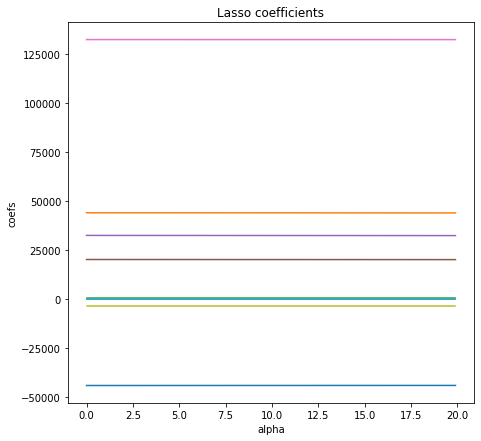

In [85]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()




        *   As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
        *   Therefore Lasso can also be used to determine which features are important to us and keeps the features that may influence the target variable





**Limitations of Lasso Regression**


      *   Lasso regressions happen to randomly select highly collinear variables which isn't good for interpretation of data.



### iv) Elastic Net Regression

In [89]:
# importing necessary libraries

from sklearn.linear_model import ElasticNet

In [88]:
# defining our x and y
# splitting the data to train and test sets
# 
X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode',]]
y = housedf['price']

In [90]:
# Elastic Net Model
# just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
#   

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [91]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength.

search.fit(X_train,y_train)
search.best_params_


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [92]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

52049742815.4148

In [93]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the Elastic model is:", e)

The RMSE for the Elastic model: 230420.29721827037
The R2 score for the Elastic model is: 0.6137559927226139


In [94]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 45909.68783706601,
 'bedrooms': -38775.162050186715,
 'condition': 21082.540377331716,
 'floors': 33601.832408899514,
 'grade': 128774.5281603373,
 'sqft_basement': 36.01273880714345,
 'sqft_living': 166.69436887772986,
 'sqft_lot': -0.0992648349179667,
 'yr_built': -3583.821366171099,
 'zipcode': 117.35837022382536}

**Limitations of Elastic Net Regression**


      *   High computational cost
      *   Another disadvantage (but at the same time an advantage) is the flexibility of the estimator. With greater flexibility comes increased probability of overfitting. It may be that the optimal α for the population and for the given sample size is 0, turning elastic net into lasso, but you happen to choose a different value due to chance (because that value delivers better performance when cross-validating in the particular sample).



# **8. Conclusion**


      *   Best performing model was our linear regression model as it had lowest RMSE.
      *  Coefficient of determination R2  is 61% across all models.
      *  It is important to note that interpretation of R2 is subjective. 





# **9. Challenging the solution**

      More varibles that account for 30% of the unexplained variance should be included in our data, to have a better accuracy.

# **10) Follow up questions**

### a). Did we have the right data?
        Yes.

### b). Do we need other data to answer our question?
        Yes, more predictor factors/variables need to be included.

### c). Did we have the right question?
        Yes.